# STORES_SALES_PREDICTION

In [15]:
#!pip install pyodbc

In [16]:
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [17]:
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=DESKTOP-U0EUVJ4;'
                      'Database=ineuron;'
                      'Trusted_Connection=yes;')
cursor=conn.cursor()

In [18]:
df = pd.read_sql("Select * from Train",conn)
pd.set_option('display.max_columns', None)
df

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200001          Regular         0.000000   
4              NCD19     8.930000          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22     6.865000          Low Fat         0.056783   
8519           FDS36     8.380000          Regular         0.046982   
8520           NCJ29    10.600000          Low Fat         0.035186   
8521           FDN46     7.210000          Regular         0.145221   
8522           DRG01    14.800000          Low Fat         0.044878   

                  Item_Type    Item_MRP Outlet_Identifier  \
0                     Dairy  249.809204            OUT049   
1               Soft Drinks   48.269199            OUT018   
2                      Meat  141.617996            OUT049   
3     Fruits and Vegetables  182.095001            OUT010   
4                 Household   53.861401            OUT013   
...                     ...         ...               ...   
8518            Snack Foods  214.521805            OUT013   
8519           Baking Goods  108.156998            OUT045   
8520     Health and Hygiene   85.122398            OUT035   
8521            Snack Foods  103.133202            OUT018   
8522            Soft Drinks   75.467003            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998        None               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002        None               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 12 columns]

In [19]:
train_data = df.copy()
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          Low Fat         0.016047   
1           DRC01     5.920000          Regular         0.019278   
2           FDN15    17.500000          Low Fat         0.016760   
3           FDX07    19.200001          Regular         0.000000   
4           NCD19     8.930000          Low Fat         0.000000   

               Item_Type    Item_MRP Outlet_Identifier  \
0                  Dairy  249.809204            OUT049   
1            Soft Drinks   48.269199            OUT018   
2                   Meat  141.617996            OUT049   
3  Fruits and Vegetables  182.095001            OUT010   
4              Household   53.861401            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998        None               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1        3735.137939  
1  Supermarket Type2         443.422791  
2  Supermarket Type1        2097.270020  
3      Grocery Store         732.380005  
4  Supermarket Type1         994.705200

# DATA ANALYSIS USING PANDAS PROFILING

In [20]:
#!pip install pandas-profiling

In [21]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train_data,title = "Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# DATA PREPROCESSING

In [22]:
train_data.shape

(8523, 12)

In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [24]:
train_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643457         0.051598    62.275066                   8.371760   
min       4.555000         0.000000    31.290001                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012802                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888397                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288915  
std          1706.499616  
min            33.290001  
25%           834.247406  
50%          1794.331055  
75%          3101.296387  
max         13086.964844

In [25]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [26]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [27]:
[features for features in train_data.columns if train_data[features].isnull().sum()>0]

['Item_Weight', 'Outlet_Size']

<AxesSubplot:>

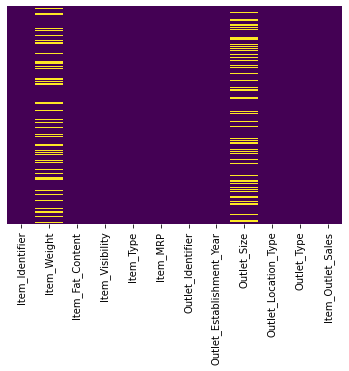

In [28]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

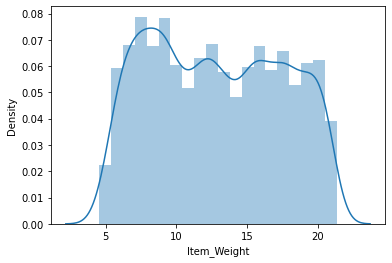

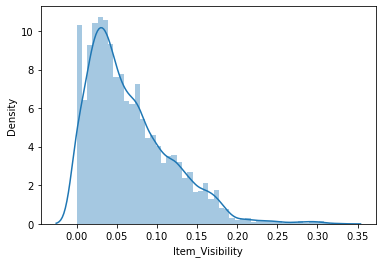

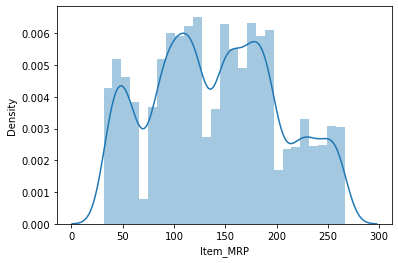

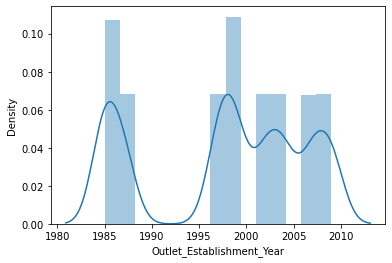

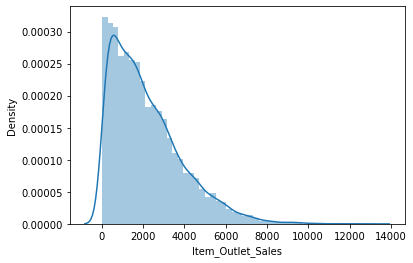

In [29]:
for i in train_data.describe().columns:
    sns.distplot(train_data[i].dropna())
    plt.show()

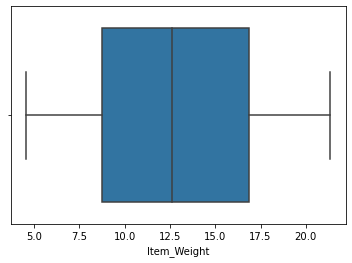

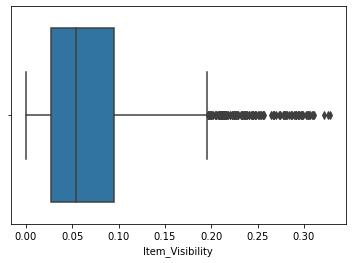

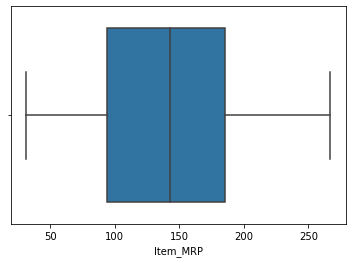

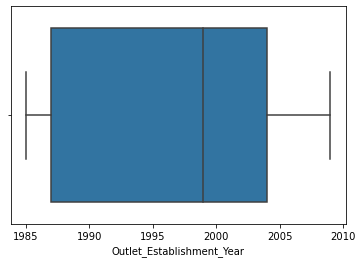

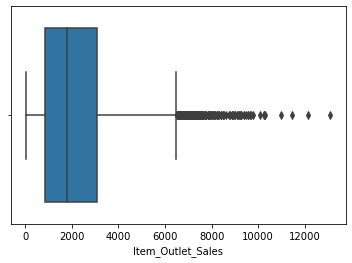

In [30]:
for i in train_data.describe().columns:
    sns.boxplot(train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

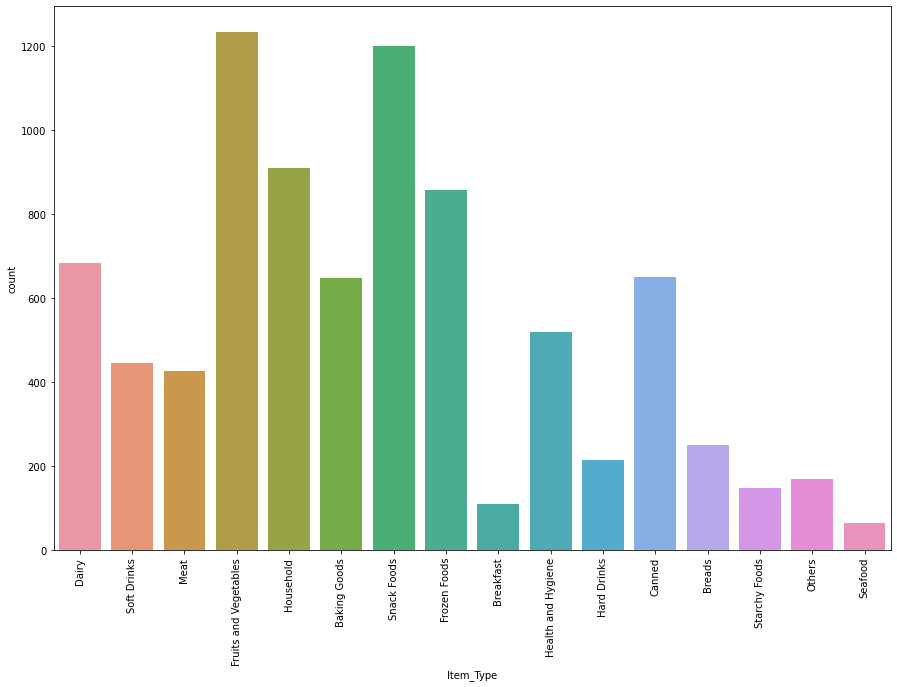

In [31]:
plt.figure(figsize = (15,10))
sns.countplot(train_data.Item_Type)
plt.xticks(rotation = 90)

In [32]:
train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

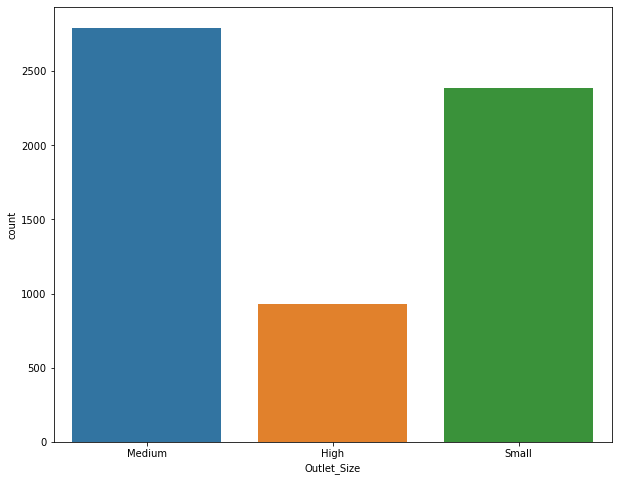

In [33]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Size)

In [34]:
train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

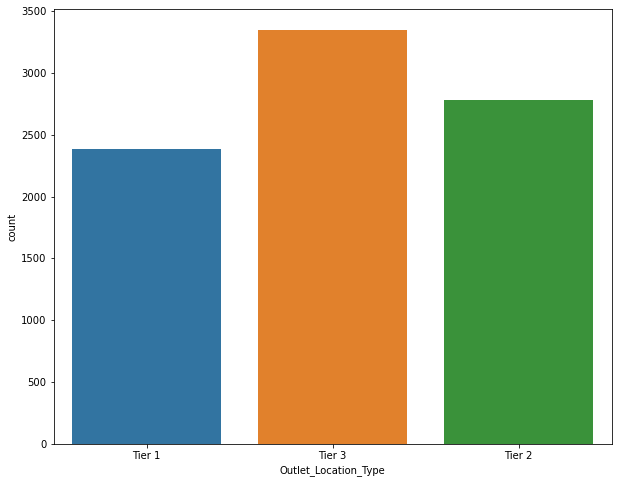

In [35]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Location_Type)

In [36]:
train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

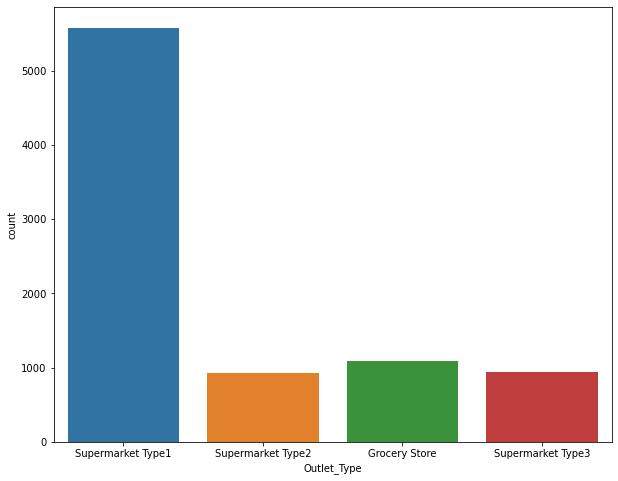

In [37]:
plt.figure(figsize = (10,8))
sns.countplot(train_data.Outlet_Type)

In [38]:
train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [39]:
train_data.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

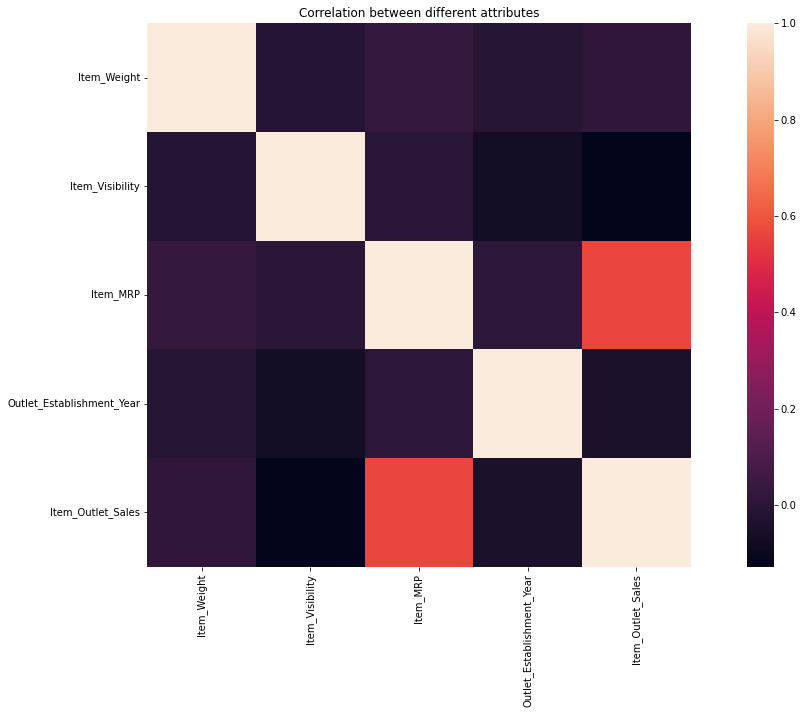

In [40]:
plt.figure(figsize = (20,10))
sns.heatmap(train_data.corr() , vmax = 1 , square = True)
plt.title('Correlation between different attributes')
plt.show()

# EDA(Exploratory Data Analysis)

**Filling Numerical Data**

In [41]:
#Item_weight is a numerical column we will fill it with Mean imputation

In [42]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(),inplace=True)

In [43]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [44]:
#Item_Visibility is a numerical column we will fill it with Mean

In [45]:
train_data['Item_Visibility'] = train_data['Item_Visibility'].astype(float, errors = 'raise')

In [46]:
print('Missing Item_Visibility before cleansing: ', sum(train_data['Item_Visibility'] == 0))

# calculate mean visibility to fill in the blanks and fill 0s
mean_visibility = train_data['Item_Visibility'].mean()

conditions = [
    train_data['Item_Visibility'] == 0,
    train_data['Item_Visibility'] != 0
]

choices = [mean_visibility, train_data['Item_Visibility']]

train_data['Item_Visibility'] = np.select(conditions, choices, default = 0)

print('Missing Item_Visibility after cleansing: ', sum(train_data['Item_Visibility'] == 0))

Missing Item_Visibility before cleansing:  526
Missing Item_Visibility after cleansing:  0


In [47]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [48]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          Low Fat         0.016047   
1           DRC01     5.920000          Regular         0.019278   
2           FDN15    17.500000          Low Fat         0.016760   
3           FDX07    19.200001          Regular         0.066132   
4           NCD19     8.930000          Low Fat         0.066132   

               Item_Type    Item_MRP Outlet_Identifier  \
0                  Dairy  249.809204            OUT049   
1            Soft Drinks   48.269199            OUT018   
2                   Meat  141.617996            OUT049   
3  Fruits and Vegetables  182.095001            OUT010   
4              Household   53.861401            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998        None               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1        3735.137939  
1  Supermarket Type2         443.422791  
2  Supermarket Type1        2097.270020  
3      Grocery Store         732.380005  
4  Supermarket Type1         994.705200

In [49]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Filling Categorical Data**

In [50]:
#Outlet_Size is catagorical column so we fill it with Mode Imputation

In [51]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [52]:
train_data['Outlet_Size'].mode()

0    Medium
dtype: object

In [53]:
train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0],inplace=True)
train_data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200001          Regular         0.066132   
4              NCD19     8.930000          Low Fat         0.066132   
...              ...          ...              ...              ...   
8518           FDF22     6.865000          Low Fat         0.056783   
8519           FDS36     8.380000          Regular         0.046982   
8520           NCJ29    10.600000          Low Fat         0.035186   
8521           FDN46     7.210000          Regular         0.145221   
8522           DRG01    14.800000          Low Fat         0.044878   

                  Item_Type    Item_MRP Outlet_Identifier  \
0                     Dairy  249.809204            OUT049   
1               Soft Drinks   48.269199            OUT018   
2                      Meat  141.617996            OUT049   
3     Fruits and Vegetables  182.095001            OUT010   
4                 Household   53.861401            OUT013   
...                     ...         ...               ...   
8518            Snack Foods  214.521805            OUT013   
8519           Baking Goods  108.156998            OUT045   
8520     Health and Hygiene   85.122398            OUT035   
8521            Snack Foods  103.133202            OUT018   
8522            Soft Drinks   75.467003            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1        3735.137939  
1     Supermarket Type2         443.422791  
2     Supermarket Type1        2097.270020  
3         Grocery Store         732.380005  
4     Supermarket Type1         994.705200  
...                 ...                ...  
8518  Supermarket Type1        2778.383301  
8519  Supermarket Type1         549.284973  
8520  Supermarket Type1        1193.113647  
8521  Supermarket Type2        1845.597656  
8522  Supermarket Type1         765.669983  

[8523 rows x 12 columns]

In [54]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [55]:
#Feature_Engineering

In [56]:
train_data['Item_Visibility'].value_counts()

0.066132    526
0.076975      3
0.107037      2
0.061271      2
0.046825      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7879, dtype: int64

In [57]:
# get first 2 characters of the Item_Identifier to frame the categories

train_data['Item_Identifier'].astype(str).str[:2].unique()

array(['FD', 'DR', 'NC'], dtype=object)

In [58]:
# making sure the counts match

train_data['Item_Identifier'].astype(str).str[:2].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [59]:
conditions = [
    (train_data['Item_Identifier'].astype(str).str[:2] == 'FD'),
    (train_data['Item_Identifier'].astype(str).str[:2] == 'DR'),
    (train_data['Item_Identifier'].astype(str).str[:2] == 'NC')
]

choices = ['Food', 'Drink', 'Non-Food']

train_data['Item_Category'] = np.select(conditions, choices, default='')

# making sure the counts match

train_data['Item_Category'].value_counts()

Food        6125
Non-Food    1599
Drink        799
Name: Item_Category, dtype: int64

In [60]:
train_data['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [61]:
train_data['Outlet_Year'] =2022 - train_data['Outlet_Establishment_Year']

In [62]:
train_data['Outlet_Year'].describe()

count    8523.000000
mean       24.168133
std         8.371760
min        13.000000
25%        18.000000
50%        23.000000
75%        35.000000
max        37.000000
Name: Outlet_Year, dtype: float64

In [63]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_Category', 'Outlet_Year'],
      dtype='object')

In [64]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          Low Fat         0.016047   
1           DRC01     5.920000          Regular         0.019278   
2           FDN15    17.500000          Low Fat         0.016760   
3           FDX07    19.200001          Regular         0.066132   
4           NCD19     8.930000          Low Fat         0.066132   

               Item_Type    Item_MRP Outlet_Identifier  \
0                  Dairy  249.809204            OUT049   
1            Soft Drinks   48.269199            OUT018   
2                   Meat  141.617996            OUT049   
3  Fruits and Vegetables  182.095001            OUT010   
4              Household   53.861401            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_Category  Outlet_Year  
0  Supermarket Type1        3735.137939          Food           23  
1  Supermarket Type2         443.422791         Drink           13  
2  Supermarket Type1        2097.270020          Food           23  
3      Grocery Store         732.380005          Food           24  
4  Supermarket Type1         994.705200      Non-Food           35

Dropping columns that have no use

In [65]:
train_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
train_data.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0     9.300000          Low Fat         0.016047                  Dairy   
1     5.920000          Regular         0.019278            Soft Drinks   
2    17.500000          Low Fat         0.016760                   Meat   
3    19.200001          Regular         0.066132  Fruits and Vegetables   
4     8.930000          Low Fat         0.066132              Household   

     Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.809204                       1999      Medium               Tier 1   
1   48.269199                       2009      Medium               Tier 3   
2  141.617996                       1999      Medium               Tier 1   
3  182.095001                       1998      Medium               Tier 3   
4   53.861401                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_Category  Outlet_Year  
0  Supermarket Type1        3735.137939          Food           23  
1  Supermarket Type2         443.422791         Drink           13  
2  Supermarket Type1        2097.270020          Food           23  
3      Grocery Store         732.380005          Food           24  
4  Supermarket Type1         994.705200      Non-Food           35

**Handling Categorical Data**

In [66]:
train_data.head()

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0     9.300000          Low Fat         0.016047                  Dairy   
1     5.920000          Regular         0.019278            Soft Drinks   
2    17.500000          Low Fat         0.016760                   Meat   
3    19.200001          Regular         0.066132  Fruits and Vegetables   
4     8.930000          Low Fat         0.066132              Household   

     Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.809204                       1999      Medium               Tier 1   
1   48.269199                       2009      Medium               Tier 3   
2  141.617996                       1999      Medium               Tier 1   
3  182.095001                       1998      Medium               Tier 3   
4   53.861401                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_Category  Outlet_Year  
0  Supermarket Type1        3735.137939          Food           23  
1  Supermarket Type2         443.422791         Drink           13  
2  Supermarket Type1        2097.270020          Food           23  
3      Grocery Store         732.380005          Food           24  
4  Supermarket Type1         994.705200      Non-Food           35

In [67]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

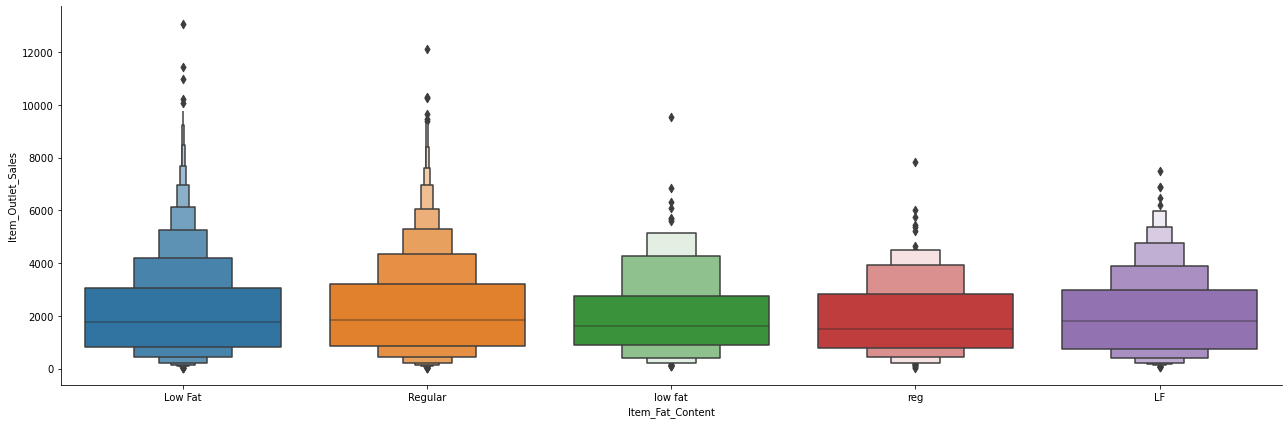

In [68]:
sns.catplot(y = "Item_Outlet_Sales", x = "Item_Fat_Content", data = train_data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Almost all are have same median under 'Item_Fat_Content'

In [69]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].replace({"LF": 'Low Fat', "reg": 'Regular', "low fat": 'Low Fat'})

In [70]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [71]:
train_data['Item_Fat_Content'] = le.fit_transform(train_data['Item_Fat_Content'])

In [72]:
train_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility              Item_Type  \
0     9.300000                 0         0.016047                  Dairy   
1     5.920000                 1         0.019278            Soft Drinks   
2    17.500000                 0         0.016760                   Meat   
3    19.200001                 1         0.066132  Fruits and Vegetables   
4     8.930000                 0         0.066132              Household   

     Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0  249.809204                       1999      Medium               Tier 1   
1   48.269199                       2009      Medium               Tier 3   
2  141.617996                       1999      Medium               Tier 1   
3  182.095001                       1998      Medium               Tier 3   
4   53.861401                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_Category  Outlet_Year  
0  Supermarket Type1        3735.137939          Food           23  
1  Supermarket Type2         443.422791         Drink           13  
2  Supermarket Type1        2097.270020          Food           23  
3      Grocery Store         732.380005          Food           24  
4  Supermarket Type1         994.705200      Non-Food           35

In [73]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

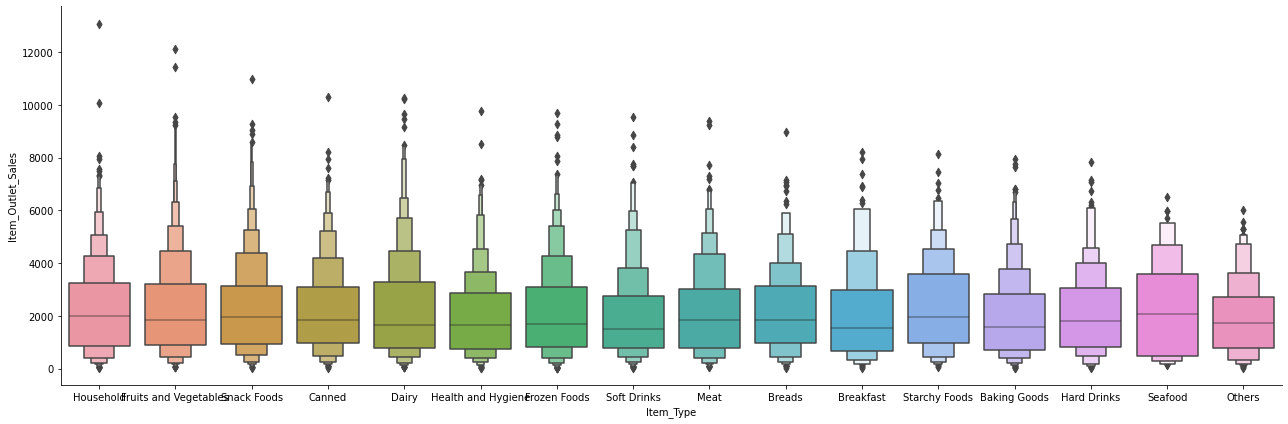

In [74]:
sns.catplot(y = "Item_Outlet_Sales", x = "Item_Type", data = train_data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Almost all are have same median under 'Item_Type'

In [75]:
train_data['Item_Type'] = le.fit_transform(train_data['Item_Type'])
train_data

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0        9.300000                 0         0.016047          4  249.809204   
1        5.920000                 1         0.019278         14   48.269199   
2       17.500000                 0         0.016760         10  141.617996   
3       19.200001                 1         0.066132          6  182.095001   
4        8.930000                 0         0.066132          9   53.861401   
...           ...               ...              ...        ...         ...   
8518     6.865000                 0         0.056783         13  214.521805   
8519     8.380000                 1         0.046982          0  108.156998   
8520    10.600000                 0         0.035186          8   85.122398   
8521     7.210000                 1         0.145221         13  103.133202   
8522    14.800000                 0         0.044878         14   75.467003   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998      Medium               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002      Medium               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales Item_Category  Outlet_Year  
0     Supermarket Type1        3735.137939          Food           23  
1     Supermarket Type2         443.422791         Drink           13  
2     Supermarket Type1        2097.270020          Food           23  
3         Grocery Store         732.380005          Food           24  
4     Supermarket Type1         994.705200      Non-Food           35  
...                 ...                ...           ...          ...  
8518  Supermarket Type1        2778.383301          Food           35  
8519  Supermarket Type1         549.284973          Food           20  
8520  Supermarket Type1        1193.113647      Non-Food           18  
8521  Supermarket Type2        1845.597656          Food           13  
8522  Supermarket Type1         765.669983         Drink           25  

[8523 rows x 12 columns]

In [76]:
train_data['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

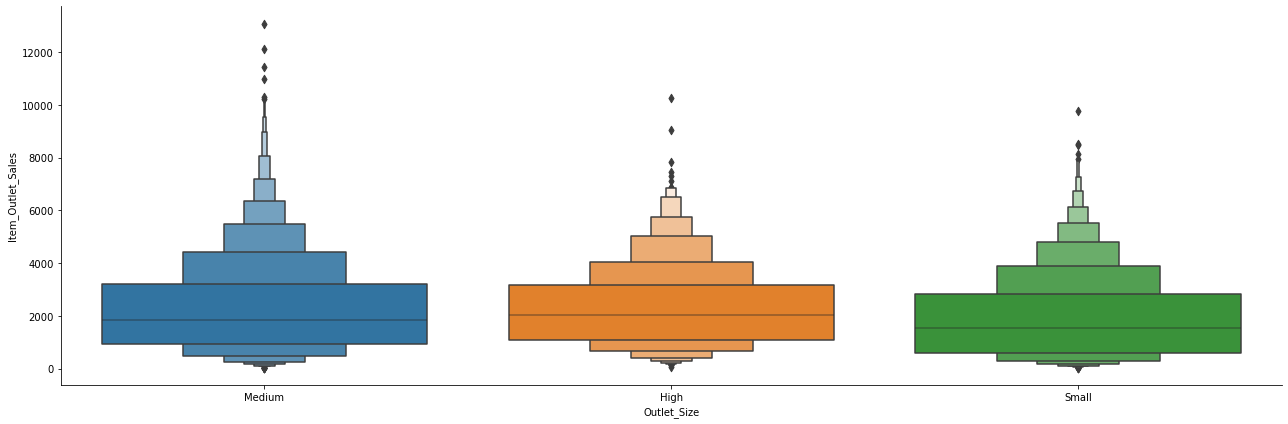

In [77]:
sns.catplot(y = "Item_Outlet_Sales", x = "Outlet_Size", data = train_data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Almost all are have same median under 'Outlet_Size'

In [78]:
train_data['Outlet_Size'] = le.fit_transform(train_data['Outlet_Size'])
train_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0     9.300000                 0         0.016047          4  249.809204   
1     5.920000                 1         0.019278         14   48.269199   
2    17.500000                 0         0.016760         10  141.617996   
3    19.200001                 1         0.066132          6  182.095001   
4     8.930000                 0         0.066132          9   53.861401   

   Outlet_Establishment_Year  Outlet_Size Outlet_Location_Type  \
0                       1999            1               Tier 1   
1                       2009            1               Tier 3   
2                       1999            1               Tier 1   
3                       1998            1               Tier 3   
4                       1987            0               Tier 3   

         Outlet_Type  Item_Outlet_Sales Item_Category  Outlet_Year  
0  Supermarket Type1        3735.137939          Food           23  
1  Supermarket Type2         443.422791         Drink           13  
2  Supermarket Type1        2097.270020          Food           23  
3      Grocery Store         732.380005          Food           24  
4  Supermarket Type1         994.705200      Non-Food           35

In [79]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

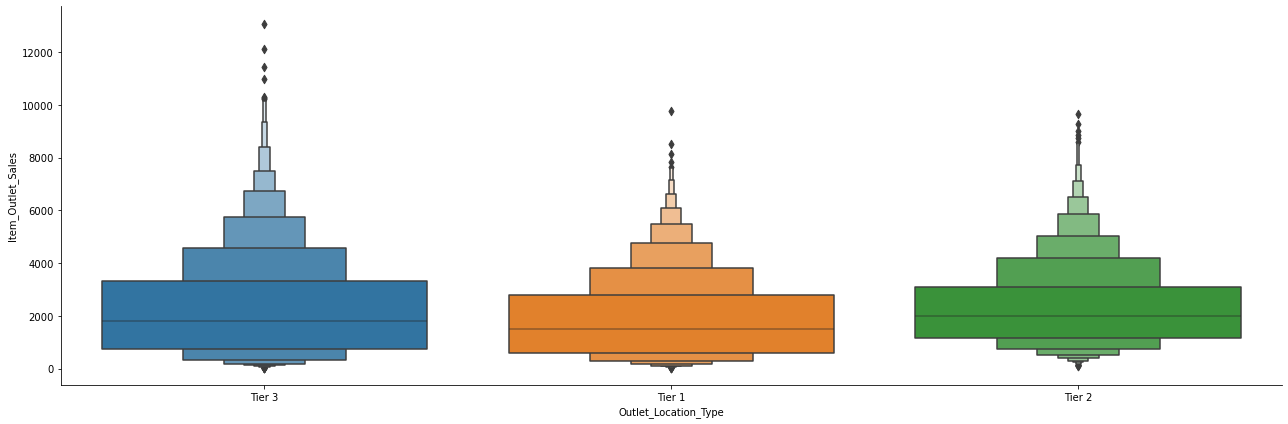

In [80]:
sns.catplot(y = "Item_Outlet_Sales", x = "Outlet_Location_Type", data = train_data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Almmost are have same median under 'Outlet_Loaction_Type'

In [81]:
train_data['Outlet_Location_Type'] = le.fit_transform(train_data['Outlet_Location_Type'])
train_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0     9.300000                 0         0.016047          4  249.809204   
1     5.920000                 1         0.019278         14   48.269199   
2    17.500000                 0         0.016760         10  141.617996   
3    19.200001                 1         0.066132          6  182.095001   
4     8.930000                 0         0.066132          9   53.861401   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0                       1999            1                     0   
1                       2009            1                     2   
2                       1999            1                     0   
3                       1998            1                     2   
4                       1987            0                     2   

         Outlet_Type  Item_Outlet_Sales Item_Category  Outlet_Year  
0  Supermarket Type1        3735.137939          Food           23  
1  Supermarket Type2         443.422791         Drink           13  
2  Supermarket Type1        2097.270020          Food           23  
3      Grocery Store         732.380005          Food           24  
4  Supermarket Type1         994.705200      Non-Food           35

In [82]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

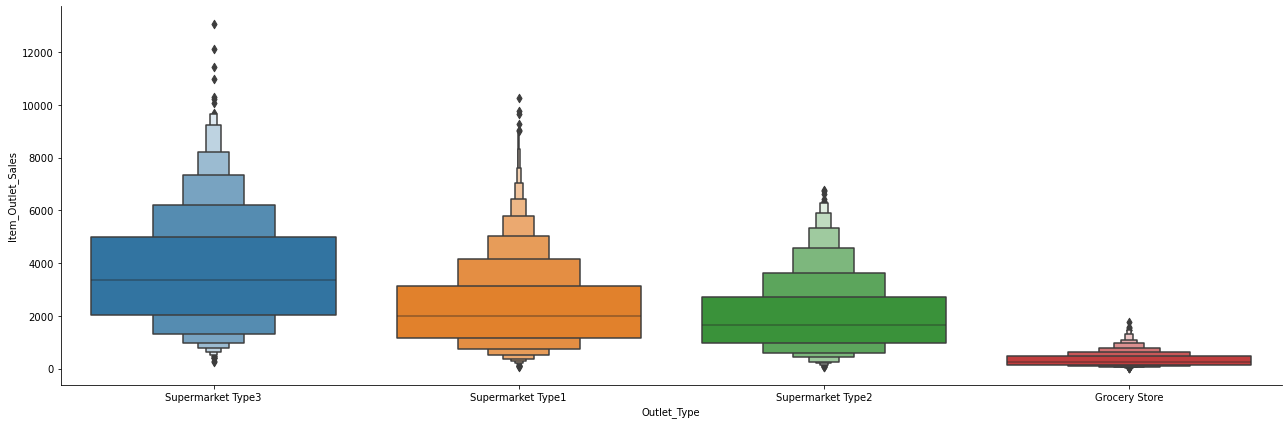

In [83]:
sns.catplot(y = "Item_Outlet_Sales", x = "Outlet_Type", data = train_data.sort_values("Item_Outlet_Sales", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

Almost all have same median except Grocery Store in 'Outlet_Type' but then also we will perform label encoding

In [84]:
train_data['Outlet_Type'] = le.fit_transform(train_data['Outlet_Type'])
train_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0     9.300000                 0         0.016047          4  249.809204   
1     5.920000                 1         0.019278         14   48.269199   
2    17.500000                 0         0.016760         10  141.617996   
3    19.200001                 1         0.066132          6  182.095001   
4     8.930000                 0         0.066132          9   53.861401   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   Item_Outlet_Sales Item_Category  Outlet_Year  
0        3735.137939          Food           23  
1         443.422791         Drink           13  
2        2097.270020          Food           23  
3         732.380005          Food           24  
4         994.705200      Non-Food           35

In [85]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Category', 'Outlet_Year'],
      dtype='object')

In [86]:
train_data['Item_Category'] = le.fit_transform(train_data['Item_Category'])
train_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0     9.300000                 0         0.016047          4  249.809204   
1     5.920000                 1         0.019278         14   48.269199   
2    17.500000                 0         0.016760         10  141.617996   
3    19.200001                 1         0.066132          6  182.095001   
4     8.930000                 0         0.066132          9   53.861401   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   Item_Outlet_Sales  Item_Category  Outlet_Year  
0        3735.137939              1           23  
1         443.422791              0           13  
2        2097.270020              1           23  
3         732.380005              1           24  
4         994.705200              2           35

In [87]:
train_data.shape

(8523, 12)

In [88]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Category', 'Outlet_Year'],
      dtype='object')

In [89]:
train_data.drop(['Item_Category',
       'Outlet_Year'],axis=1,inplace=True)

In [90]:
train_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0     9.300000                 0         0.016047          4  249.809204   
1     5.920000                 1         0.019278         14   48.269199   
2    17.500000                 0         0.016760         10  141.617996   
3    19.200001                 1         0.066132          6  182.095001   
4     8.930000                 0         0.066132          9   53.861401   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2009            1                     2            2   
2                       1999            1                     0            1   
3                       1998            1                     2            0   
4                       1987            0                     2            1   

   Item_Outlet_Sales  
0        3735.137939  
1         443.422791  
2        2097.270020  
3         732.380005  
4         994.705200

In [91]:
train_data.shape

(8523, 10)

In [92]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Now I will take the test data from SQL and do some preprocessing steps on Test data as I did on train data

In [93]:
df1 = pd.read_sql("Select * from Test",conn)
pd.set_option('display.max_columns', None)
df1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

     Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.862198            OUT049                       1999      Medium   
1   87.319801            OUT017                       2007        None   
2  241.753799            OUT010                       1998        None   
3  155.033997            OUT017                       2007        None   
4  234.229996            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

In [94]:
test_data = df1.copy()
test_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

     Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  107.862198            OUT049                       1999      Medium   
1   87.319801            OUT017                       2007        None   
2  241.753799            OUT010                       1998        None   
3  155.033997            OUT017                       2007        None   
4  234.229996            OUT027                       1985      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 2  Supermarket Type1  
2               Tier 3      Grocery Store  
3               Tier 2  Supermarket Type1  
4               Tier 3  Supermarket Type3

# DATA ANALYSIS USING PANDAS PROFILING

In [95]:
from pandas_profiling import ProfileReport
profile = ProfileReport(test_data,title = "Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data Preprocessing

In [96]:
test_data.shape

(5681, 11)

In [97]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [98]:
test_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year
count  4705.000000      5681.000000  5681.000000                5681.000000
mean     12.695634         0.065684   141.023273                1997.828903
std       4.664849         0.051252    61.809091                   8.372256
min       4.555000         0.000000    31.990000                1985.000000
25%       8.645000         0.027047    94.412003                1987.000000
50%      12.500000         0.054154   141.415405                1999.000000
75%      16.700001         0.093463   186.026596                2004.000000
max      21.350000         0.323637   266.588409                2009.000000

In [99]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [100]:
[features for features in test_data.columns if test_data[features].isnull().sum()>0]

['Item_Weight', 'Outlet_Size']

<AxesSubplot:>

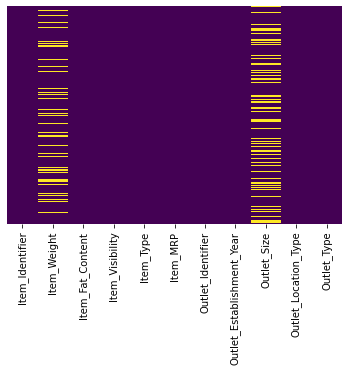

In [101]:
sns.heatmap(test_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [102]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [103]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# EDA

**Filling Numerical Data**

In [104]:
#Item_weight is a numerical column we will fill it with Mean imputation
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(),inplace=True)

In [105]:
#Item_Visibility is a numerical column we will fill it with Mean imputation
print('Missing Item_Visibility before cleansing: ', sum(test_data['Item_Visibility'] == 0))

# calculate mean visibility to fill in the blanks and fill 0s
mean_visibility = test_data['Item_Visibility'].mean()

conditions = [
    test_data['Item_Visibility'] == 0,
    test_data['Item_Visibility'] != 0
]

choices = [mean_visibility, test_data['Item_Visibility']]

test_data['Item_Visibility'] = np.select(conditions, choices, default = 0)

print('Missing Item_Visibility after cleansing: ', sum(test_data['Item_Visibility'] == 0))

Missing Item_Visibility before cleansing:  353
Missing Item_Visibility after cleansing:  0


**Filling Categorical Data**

Outlet_Size is catagorical column so we fill it with Mode Imputation

In [106]:
test_data['Outlet_Size'].mode()


0    Medium
dtype: object

In [107]:
test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0],inplace=True)

In [108]:
# get first 2 characters of the Item_Identifier to frame the categories

test_data['Item_Identifier'].astype(str).str[:2].unique()

array(['FD', 'NC', 'DR'], dtype=object)

In [109]:
# making sure the counts match

test_data['Item_Identifier'].astype(str).str[:2].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier, dtype: int64

In [110]:
conditions = [
    (test_data['Item_Identifier'].astype(str).str[:2] == 'FD'),
    (test_data['Item_Identifier'].astype(str).str[:2] == 'DR'),
    (test_data['Item_Identifier'].astype(str).str[:2] == 'NC')
]

choices = ['Food', 'Drink', 'Non-Food']

test_data['Item_Category'] = np.select(conditions, choices, default='')

# making sure the counts match

test_data['Item_Category'].value_counts()

Food        4076
Non-Food    1087
Drink        518
Name: Item_Category, dtype: int64

**Dropping Columns that have no use**

In [111]:
test_data.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [112]:
test_data['Outlet_Year'] =2022 - test_data['Outlet_Establishment_Year']

In [113]:
test_data.head()

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type    Item_MRP  \
0    20.750000          Low Fat         0.007565  Snack Foods  107.862198   
1     8.300000              reg         0.038428        Dairy   87.319801   
2    14.600000          Low Fat         0.099575       Others  241.753799   
3     7.315000          Low Fat         0.015388  Snack Foods  155.033997   
4    12.695634          Regular         0.118599        Dairy  234.229996   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2007      Medium               Tier 2   
2                       1998      Medium               Tier 3   
3                       2007      Medium               Tier 2   
4                       1985      Medium               Tier 3   

         Outlet_Type Item_Category  Outlet_Year  
0  Supermarket Type1          Food           23  
1  Supermarket Type1          Food           15  
2      Grocery Store      Non-Food           24  
3  Supermarket Type1          Food           15  
4  Supermarket Type3          Food           37

In [114]:
test_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Category', 'Outlet_Year'],
      dtype='object')

# Handling Categorical Data

In [115]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].replace({"LF": 'Low Fat', "reg": 'Regular', "low fat": 'Low Fat'})
test_data['Item_Fat_Content'] = le.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type'] = le.fit_transform(test_data['Item_Type'])
test_data['Outlet_Type'] = le.fit_transform(test_data['Outlet_Type'])
test_data['Outlet_Location_Type'] = le.fit_transform(test_data['Outlet_Location_Type'])
test_data['Item_Category'] = le.fit_transform(test_data['Item_Category'])

test_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0    20.750000                 0         0.007565         13  107.862198   
1     8.300000                 1         0.038428          4   87.319801   
2    14.600000                 0         0.099575         11  241.753799   
3     7.315000                 0         0.015388         13  155.033997   
4    12.695634                 1         0.118599          4  234.229996   

   Outlet_Establishment_Year Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999      Medium                     0            1   
1                       2007      Medium                     1            1   
2                       1998      Medium                     2            0   
3                       2007      Medium                     1            1   
4                       1985      Medium                     2            3   

   Item_Category  Outlet_Year  
0              1           23  
1              1           15  
2              2           24  
3              1           15  
4              1           37

In [116]:
test_data['Outlet_Size'] = le.fit_transform(test_data['Outlet_Size'])
test_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0    20.750000                 0         0.007565         13  107.862198   
1     8.300000                 1         0.038428          4   87.319801   
2    14.600000                 0         0.099575         11  241.753799   
3     7.315000                 0         0.015388         13  155.033997   
4    12.695634                 1         0.118599          4  234.229996   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     0            1   
1                       2007            1                     1            1   
2                       1998            1                     2            0   
3                       2007            1                     1            1   
4                       1985            1                     2            3   

   Item_Category  Outlet_Year  
0              1           23  
1              1           15  
2              2           24  
3              1           15  
4              1           37

In [117]:
test_data.drop(['Item_Category',
       'Outlet_Year'],axis=1,inplace=True)

In [118]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [119]:
train_data.shape

(8523, 10)

In [120]:
test_data.shape

(5681, 9)

# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

1.**heatmap**

2.**feature_importance_**

3.**SelectKBest**

In [121]:
X=train_data.drop('Item_Outlet_Sales',axis=1)
X.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
0     9.300000                 0         0.016047          4  249.809204   
1     5.920000                 1         0.019278         14   48.269199   
2    17.500000                 0         0.016760         10  141.617996   
3    19.200001                 1         0.066132          6  182.095001   
4     8.930000                 0         0.066132          9   53.861401   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  
0                       1999            1                     0            1  
1                       2009            1                     2            2  
2                       1999            1                     0            1  
3                       1998            1                     2            0  
4                       1987            0                     2            1

In [122]:
Y=train_data['Item_Outlet_Sales']
Y.head()

0    3735.137939
1     443.422791
2    2097.270020
3     732.380005
4     994.705200
Name: Item_Outlet_Sales, dtype: float64

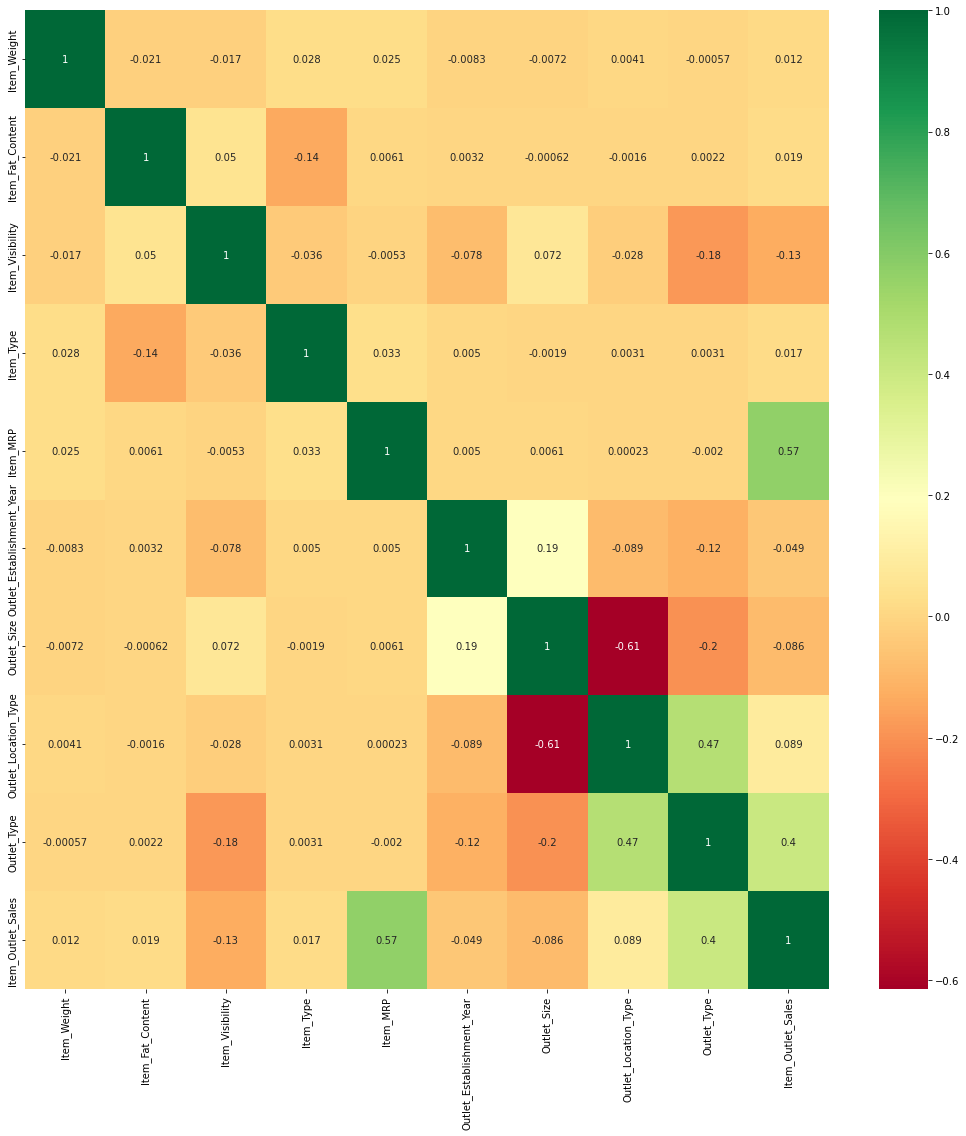

In [123]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [124]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor()

In [125]:
print(selection.feature_importances_)

[0.06182913 0.0190685  0.09299454 0.07083779 0.43705361 0.04249565
 0.01780159 0.01498238 0.2429368 ]


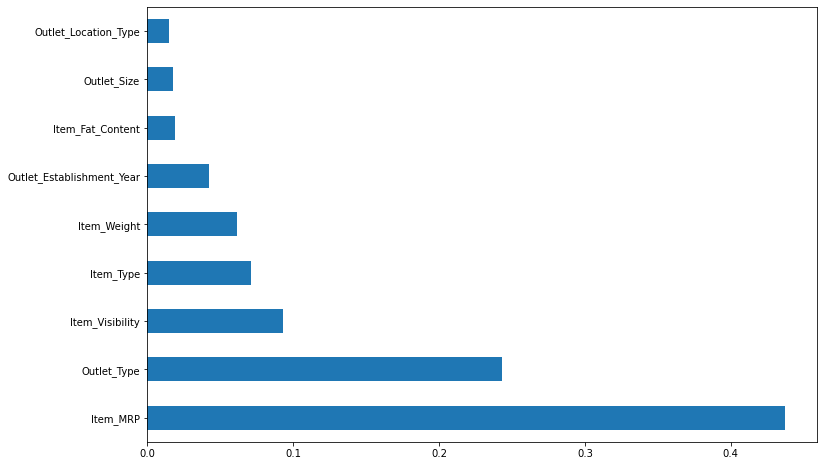

In [126]:
#plotting graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Splitting Data into Train and Test

In [127]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=2, test_size=0.2)

# Model Building

In [128]:
#Implementing different algorithms to get best model for the model with good accuracy and less mean_squared_error

In [129]:
#Applying Linear Regression

In [130]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression(normalize = True)

In [131]:
lr.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [132]:
lr.score(X_train,Y_train)

0.5118481060821714

In [133]:
Y_pred_lr=lr.predict(X_test)

In [134]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [135]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.4919742687630768
940.1228197856077
1252.3231975777678


In [136]:
#Applying Random Forest Regressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000,min_samples_split = 10,max_depth = 10,min_samples_leaf = 5,n_jobs=4)

In [138]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=1000, n_jobs=4)

In [139]:
rf.score(X_train,Y_train)

0.7006678589928599

In [140]:
Y_pred_rf= rf.predict(X_test)

In [141]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5769967672430768
795.5447121112663
1142.7346960864224


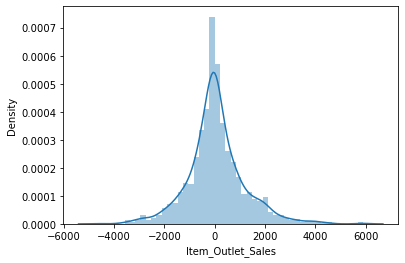

In [142]:
import seaborn as sns
sns.distplot(Y_test-Y_pred_rf)
plt.show()

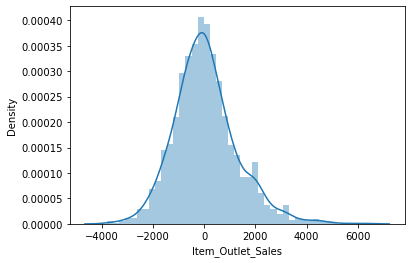

In [143]:
sns.distplot(Y_test-Y_pred_lr)
plt.show()

In [144]:
#Hyperparameter Tuning on RandomForest
from sklearn.model_selection import RandomizedSearchCV

In [145]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [146]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [147]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=40, n_jobs = 1)

In [148]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=  10.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   7.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   7.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   7.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1200; total time=   7.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.9s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=10,
                                                   min_samples_leaf=5,
                                                   min_samples_split=10,
                                                   n_estimators=1000,
                                                   n_jobs=4),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
      

In [149]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 20}

In [150]:
rf_new = RandomForestRegressor(n_estimators=400,min_samples_split=2,min_samples_leaf=10,max_features='sqrt',max_depth=20)

In [151]:
rf_new.fit(X_train,Y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=10,
                      n_estimators=400)

In [152]:
prediction = rf_new.predict(X_test)

In [153]:
rf.score(X_train,Y_train)

0.7006678589928599

In [154]:
print(r2_score(Y_test,prediction))
print(mean_absolute_error(Y_test,prediction))
print(np.sqrt(mean_squared_error(Y_test,prediction)))

0.5837982827415089
790.0381867759744
1133.5103877326417


In [155]:
#Applying Decision Tree Regressor

In [156]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth = 15,min_samples_leaf = 100)

tree.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

In [157]:
tree.score(X_train,Y_train)

0.6177156448077374

In [158]:
y_pred_dt = tree.predict(X_test)

In [159]:
print(r2_score(Y_test,y_pred_dt))
print(mean_absolute_error(Y_test,y_pred_dt))
print(np.sqrt(mean_squared_error(Y_test,y_pred_dt)))

0.5730067341997689
800.9489205392291
1148.111543262784


In [160]:
#Applying XgBoost Regressor

In [161]:
from xgboost import XGBRegressor
xg = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1,
             monotone_constraints='()', n_estimators=1000, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [162]:
xg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=6,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [163]:
y_pred_xg = xg.predict(X_test)

In [164]:
xg.score(X_train,Y_train)

0.8924854487900468

In [165]:
print(r2_score(Y_test,y_pred_xg))
print(mean_absolute_error(Y_test,y_pred_xg))
print(np.sqrt(mean_squared_error(Y_test,y_pred_xg)))

0.5307274137375546
844.7228946983639
1203.6110406118419


In [166]:
X_train.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
7173    11.800000                 1         0.057422         10  149.936600   
3315    12.857645                 0         0.066132          0  100.138397   
5932     7.725000                 0         0.047783          3  249.109207   
7872    10.500000                 0         0.052555          5   89.682999   
5946    12.857645                 1         0.235859         13   46.140202   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
7173                       1997            2                     0   
3315                       1985            1                     2   
5932                       1997            2                     0   
7872                       1997            2                     0   
5946                       1985            2                     0   

      Outlet_Type  
7173            1  
3315            3  
5932            1  
7872            1  
5946            0

In [167]:
X_test.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type    Item_MRP  \
1112    12.857645                 0         0.099747          6   75.232803   
1751    12.150000                 0         0.131446          5  246.845993   
7648     5.800000                 0         0.131221          4   87.817200   
7362    17.000000                 0         0.087388          8  125.072998   
5332    12.857645                 0         0.009585          5  102.501602   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
1112                       1985            1                     2   
1751                       2002            1                     1   
7648                       2002            1                     1   
7362                       1998            1                     2   
5332                       1985            2                     0   

      Outlet_Type  
1112            3  
1751            1  
7648            1  
7362            0  
5332            0

In [169]:
#Selected Random Forest Algorithm because the difference between Training and Testing accuracy is less and also providing less mean absoulte error as compared to others.

In [168]:
rf_random.predict([[7.210,0,0.145220646,0,103.1332,2009,2,1,3]])

array([1915.50585866])

In [170]:
rf_random.predict([[19.200,0,0.0,0,182.0950,1998,1,1,0]])

array([738.14770526])

In [171]:
prediction

array([2284.54819413, 3629.78655534, 1490.28798996, ..., 2717.59783826,
       3457.58011321, 3807.90202216])

# Save The Model to reuse it again

In [176]:
import pickle
# open a file, where we want to store the data
file = open('pred_sale.pkl', 'wb')

In [179]:
# dumping information to that file
pickle.dump(rf_random, file)

In [180]:
model = open('pred_sale.pkl','rb')
forest = pickle.load(model)

In [181]:
y_prediction = forest.predict(X_test)

In [182]:
from sklearn import metrics
metrics.r2_score(Y_test, y_prediction)

0.5829162681074795

In [173]:
#Exporting X_test Predicted result into a new column with creating dataframe

In [183]:
dataset = pd.DataFrame(prediction,columns=['Predicted_price'])
dataset.head()

Predicted_price
0      2283.239904
1      3579.880127
2      1529.280752
3       269.490419
4       264.931254

In [184]:
dataset.shape

(1705, 1)

In [185]:
y_prediction = forest.predict(X_train)

In [174]:
#Exporting X_train Predicted result into a new column with creating dataframe

In [186]:
dataset1 = pd.DataFrame(y_prediction,columns=['Predicted_price'])
dataset1.head()

Predicted_price
0      2246.009620
1      2668.975036
2      3930.379008
3      1250.524210
4       165.147652

In [175]:
#concat both the predicted column in one column

In [187]:
dataframe = pd.concat([dataset1, dataset], ignore_index=True, sort=False)
dataframe.head()

Predicted_price
0      2246.009620
1      2668.975036
2      3930.379008
3      1250.524210
4       165.147652

In [188]:
dataframe.shape

(8523, 1)

In [189]:
df.shape

(8523, 12)

In [176]:
#concat both(original and predicted) dataframes into a new dataframe to export back in a sql 

In [190]:
dataframe1 = pd.concat([df, dataframe], axis=1)
dataframe1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          Low Fat         0.016047   
1           DRC01     5.920000          Regular         0.019278   
2           FDN15    17.500000          Low Fat         0.016760   
3           FDX07    19.200001          Regular         0.000000   
4           NCD19     8.930000          Low Fat         0.000000   

               Item_Type    Item_MRP Outlet_Identifier  \
0                  Dairy  249.809204            OUT049   
1            Soft Drinks   48.269199            OUT018   
2                   Meat  141.617996            OUT049   
3  Fruits and Vegetables  182.095001            OUT010   
4              Household   53.861401            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998        None               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Predicted_price  
0  Supermarket Type1        3735.137939      2246.009620  
1  Supermarket Type2         443.422791      2668.975036  
2  Supermarket Type1        2097.270020      3930.379008  
3      Grocery Store         732.380005      1250.524210  
4  Supermarket Type1         994.705200       165.147652

In [191]:
dataframe1.shape

(8523, 13)

In [177]:
#Export data to csv(It will also used for backup purpose)

In [192]:
dataframe1.to_csv('modified.csv',index=False)
dataframe1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          Low Fat         0.016047   
1           DRC01     5.920000          Regular         0.019278   
2           FDN15    17.500000          Low Fat         0.016760   
3           FDX07    19.200001          Regular         0.000000   
4           NCD19     8.930000          Low Fat         0.000000   

               Item_Type    Item_MRP Outlet_Identifier  \
0                  Dairy  249.809204            OUT049   
1            Soft Drinks   48.269199            OUT018   
2                   Meat  141.617996            OUT049   
3  Fruits and Vegetables  182.095001            OUT010   
4              Household   53.861401            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998        None               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  Predicted_price  
0  Supermarket Type1        3735.137939      2246.009620  
1  Supermarket Type2         443.422791      2668.975036  
2  Supermarket Type1        2097.270020      3930.379008  
3      Grocery Store         732.380005      1250.524210  
4  Supermarket Type1         994.705200       165.147652

In [178]:
#export prediction column to sql in new table(Sales_prediction)

import pyodbc
import pandas as pd
conn = pyodbc.connect('Driver={ODBC Driver 17 for SQL Server};'
                      'Server=DESKTOP-U0EUVJ4;'
                      'Database=ineuron;'
                      'Trusted_Connection=yes;')


cursor=conn.cursor()
df2=pd.read_csv("modified.csv")

In [194]:
df2.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Predicted_price                 0
dtype: int64

In [195]:
df2 = df2.fillna(value=0)
df2

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15     9.300000          Low Fat         0.016047   
1              DRC01     5.920000          Regular         0.019278   
2              FDN15    17.500000          Low Fat         0.016760   
3              FDX07    19.200001          Regular         0.000000   
4              NCD19     8.930000          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22     6.865000          Low Fat         0.056783   
8519           FDS36     8.380000          Regular         0.046982   
8520           NCJ29    10.600000          Low Fat         0.035186   
8521           FDN46     7.210000          Regular         0.145221   
8522           DRG01    14.800000          Low Fat         0.044878   

                  Item_Type    Item_MRP Outlet_Identifier  \
0                     Dairy  249.809204            OUT049   
1               Soft Drinks   48.269199            OUT018   
2                      Meat  141.617996            OUT049   
3     Fruits and Vegetables  182.095001            OUT010   
4                 Household   53.861401            OUT013   
...                     ...         ...               ...   
8518            Snack Foods  214.521805            OUT013   
8519           Baking Goods  108.156998            OUT045   
8520     Health and Hygiene   85.122398            OUT035   
8521            Snack Foods  103.133202            OUT018   
8522            Soft Drinks   75.467003            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998           0               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002           0               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  Predicted_price  
0     Supermarket Type1        3735.137939      2246.009620  
1     Supermarket Type2         443.422791      2668.975036  
2     Supermarket Type1        2097.270020      3930.379008  
3         Grocery Store         732.380005      1250.524210  
4     Supermarket Type1         994.705200       165.147652  
...                 ...                ...              ...  
8518  Supermarket Type1        2778.383301      3235.763573  
8519  Supermarket Type1         549.284973       845.480871  
8520  Supermarket Type1        1193.113647      2684.987120  
8521  Supermarket Type2        1845.597656      3394.443608  
8522  Supermarket Type1         765.669983      3793.836297  

[8523 rows x 13 columns]

In [196]:
cursor.execute('create table Sales_Prediction(Item_Identifier nvarchar(max),Item_Weight nvarchar(max),Item_Fat_Content nvarchar(max),Item_Visibility nvarchar(max),Item_Type nvarchar(max),Item_MRP nvarchar(max),Outlet_Identifier nvarchar(max),Outlet_Establishment_Year nvarchar(max),Outlet_Size nvarchar(max),Outlet_Location_Type nvarchar(max),Outlet_Type nvarchar(max),Item_Outlet_Sales nvarchar(max),Predicted_price nvarchar(max))')

In [197]:
for row in df2.itertuples():
    cursor.execute('''
                  insert into ineuron.dbo.Sales_Prediction (Item_Identifier,Item_Weight,Item_Fat_Content,
                  Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Predicted_price)
                  values(?,?,?,?,?,?,?,?,?,?,?,?,?)
                  ''',
                  row.Item_Identifier,
                  row.Item_Weight,
                  row.Item_Fat_Content,
                  row.Item_Visibility,
                  row.Item_Type,
                  row.Item_MRP,
                  row.Outlet_Identifier,
                  row.Outlet_Establishment_Year,
                  row.Outlet_Size,
                  row.Outlet_Location_Type,
                  row.Outlet_Type,
                  row.Item_Outlet_Sales,
                  row.Predicted_price
                  
                  
                  )

conn.commit() 

In [198]:
df10 = pd.read_sql("Select * from Sales_Prediction",conn)
pd.set_option('display.max_columns', None)
df10

Item_Identifier Item_Weight Item_Fat_Content Item_Visibility  \
0              FDA15         9.3          Low Fat       0.0160473   
1              DRC01        5.92          Regular       0.0192782   
2              FDN15        17.5          Low Fat       0.0167601   
3              FDX07        19.2          Regular               0   
4              NCD19        8.93          Low Fat               0   
...              ...         ...              ...             ...   
8518           FDF22       6.865          Low Fat       0.0567834   
8519           FDS36        8.38          Regular       0.0469824   
8520           NCJ29        10.6          Low Fat       0.0351863   
8521           FDN46        7.21          Regular        0.145221   
8522           DRG01        14.8          Low Fat       0.0448783   

                  Item_Type Item_MRP Outlet_Identifier  \
0                     Dairy  249.809            OUT049   
1               Soft Drinks  48.2692            OUT018   
2                      Meat  141.618            OUT049   
3     Fruits and Vegetables  182.095            OUT010   
4                 Household  53.8614            OUT013   
...                     ...      ...               ...   
8518            Snack Foods  214.522            OUT013   
8519           Baking Goods  108.157            OUT045   
8520     Health and Hygiene  85.1224            OUT035   
8521            Snack Foods  103.133            OUT018   
8522            Soft Drinks   75.467            OUT046   

     Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                         1999      Medium               Tier 1   
1                         2009      Medium               Tier 3   
2                         1999      Medium               Tier 1   
3                         1998           0               Tier 3   
4                         1987        High               Tier 3   
...                        ...         ...                  ...   
8518                      1987        High               Tier 3   
8519                      2002           0               Tier 2   
8520                      2004       Small               Tier 2   
8521                      2009      Medium               Tier 3   
8522                      1997       Small               Tier 1   

            Outlet_Type Item_Outlet_Sales Predicted_price  
0     Supermarket Type1           3735.14         2246.01  
1     Supermarket Type2           443.423         2668.98  
2     Supermarket Type1           2097.27         3930.38  
3         Grocery Store            732.38         1250.52  
4     Supermarket Type1           994.705         165.148  
...                 ...               ...             ...  
8518  Supermarket Type1           2778.38         3235.76  
8519  Supermarket Type1           549.285         845.481  
8520  Supermarket Type1           1193.11         2684.99  
8521  Supermarket Type2            1845.6         3394.44  
8522  Supermarket Type1            765.67         3793.84  

[8523 rows x 13 columns]

# Summary-> 
Sales is predicted using ML for future prospective after taking data from SQL Server and after getting a result again exporting data to SQL server so that a report can make in PowerBI through connecting SQL with PowerBi and Shown a result to a client through some Reports.